In [1]:
import cv2
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt

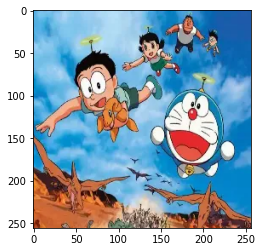

In [2]:
image_path = '../Pictures/doraemon.webp'
image = cv2.imread(image_path)
h = np.array(image)
blue, green, red = cv2.split(h)
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)
x, y, z = np.shape(image)

In [3]:
def get_combined_transformation(x, y, theta, v1, v2, l, b, t):
    x1 = x * math.cos(theta) - y * math.sin(theta) + v1 * t
    y1 = x * math.sin(theta) + y * math.cos(theta) + v2 * t
    return int(x1) % l, int(y1) % b

In [4]:
theta = random.randint(-180, 180)
v1 = random.randint(1, 100)
v2 = random.randint(1, 100)
t = time.time()
freq = random.randint(10, 20)

In [5]:
for k in range(freq):
    for i in range(x):
        for j in range(y):
            new_x, new_y = get_combined_transformation(i, j, theta, v1, v2, x, y, t)
            red[i][j] = red[new_x][new_y] ^ red[i][j]
            blue[i][j] = blue[new_x][new_y] ^ blue[i][j]
            green[i][j] = green[new_x][new_y] ^ green[i][j]

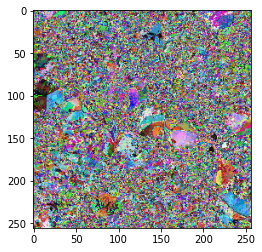

In [6]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [7]:
for k in range(freq):
    for i in range(x - 1, -1, -1):
        for j in range(y - 1, -1, -1):
            new_x, new_y = get_combined_transformation(i, j, theta, v1, v2, x, y, t)
            red[i][j] = red[new_x][new_y] ^ red[i][j]
            blue[i][j] = blue[new_x][new_y] ^ blue[i][j]
            green[i][j] = green[new_x][new_y] ^ green[i][j]

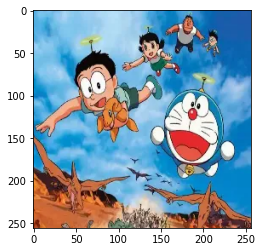

In [8]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [9]:
def get_2D_logistic_adjusted_sine_map(x, y, u, limit):
    def get_next_x(x, y, u):
        return math.sin(math.pi * u * (y + 3) * x * (1 - x))
    def get_next_y(x, y, u):
        return math.sin(math.pi * u * (x + 3) * y * (1 - x))
    result_x = []
    result_y = []
    for i in range(limit):
        result_x.append(x)
        result_y.append(y)
        x = get_next_x(x, y, u)
        y = get_next_y(x, y, u)
    return result_x, result_y

In [10]:
x_ = random.uniform(1, 100)
y_ = random.uniform(1, 100)
u_ = random.uniform(1, 100)
limit = 256

In [11]:
result_x, result_y = get_2D_logistic_adjusted_sine_map(x_, y_, u_, limit)